# 선형 회귀(Linear Regression)
* 데이터의 경향성을 가장 잘 설명하는 하나의 직선을 예측하는 것
* 국어 성적과 수학 성적, 키와 몸무게, 치킨 파매량과 맥주 판매량 등 2개의 데이터에 대한 경향성을 예측할 때 사용 

### 지역별 인구증가율과 고령인구율 

#### 시각화 

In [42]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [43]:
# 한글 폰트 깨질 때  
from matplotlib import font_manager, rc, use
#import tkinter
import matplotlib
#matplotlib.use('TkAgg')
font_path = "../utils/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

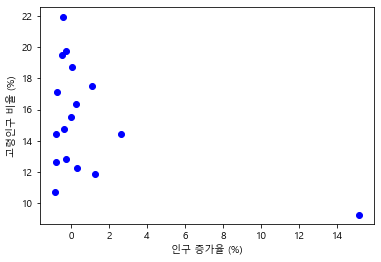

In [44]:
# 인구 증가율 
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
# 고령인구 비율 
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

plt.plot(population_inc, population_old, 'bo')    # 파란 둥근점 
plt.xlabel('인구 증가율 (%)')
plt.ylabel('고령인구 비율 (%)')
plt.show()

* 위의 그래프는 오른쪽 아래 극단치(outlier)를 하나 가지고 있다. 이는 일반적인 경향에서 벗어나기 때문에 제거한다. 

C:\Users\DA0207DYD\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DA0207DYD\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


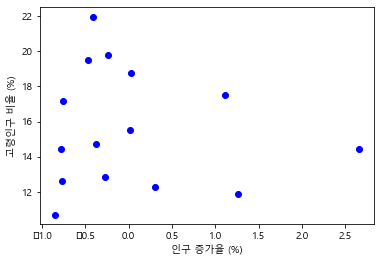

In [63]:
X = population_inc[:5] + population_inc[6:]
Y = population_old[:5] + population_old[6:]
plt.plot(X, Y, 'bo')    # 파란 둥근점 
plt.xlabel('인구 증가율 (%)')
plt.ylabel('고령인구 비율 (%)')
plt.show()

#### 선형 회귀 사용 
* 데이터 경향성 : 하나의 직선과 각 데이터의 차이(residual-잔차)
* 최소 제곱법(Least Square Method) : 잔차의 제곱을 최소화하는 알고리즘 

#### 변수 초기화(W, b)

In [68]:
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
vars = [W, b]
print(vars)

[<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-1.0916559], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.5230345], dtype=float32)>]


#### 가설 

In [76]:
def hypothesis(X):
    return X * W + b

hypothesis(X)

<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([-0.8505313 ,  0.328457  , -1.898521  , -0.55578417, -1.7347724 ,
       -0.2610371 , -0.00995624,  0.31754047, -0.11912185,  0.404873  ,
       -0.07545561, -0.22828743, -0.54486763,  0.30662394, -3.426839  ],
      dtype=float32)>

#### 비용함수 

In [96]:
def loss_fn():
    loss = tf.reduce_mean(tf.square(Y - hypothesis(X)))
    return loss
loss_fn()

<tf.Tensor: shape=(), dtype=float32, numpy=10.388779>

####  최적화 수행 

In [97]:
optimizer = tf.optimizers.Adam(lr=0.07)

#### 학습 

In [98]:
for i in range(1001):
    optimizer.minimize(loss_fn, var_list = vars)  # vars = [W, b]
    loss = loss_fn()
    if i % 100 == 0:
        print(i, 'W:', W.numpy(), 'b:', b.numpy(), 'loss:', loss.numpy())

0 W: [-0.37355644] b: [15.684737] loss: 10.393329
100 W: [-0.36812657] b: [15.6173525] loss: 10.388778
200 W: [-0.3683681] b: [15.617295] loss: 10.38878
300 W: [-0.36836585] b: [15.617296] loss: 10.388779
400 W: [-0.36836594] b: [15.617297] loss: 10.38878
500 W: [-0.36836657] b: [15.617297] loss: 10.388778
600 W: [-0.36836666] b: [15.617297] loss: 10.388778
700 W: [-0.36836675] b: [15.617297] loss: 10.388778
800 W: [-0.3683672] b: [15.617297] loss: 10.388778
900 W: [-0.36836684] b: [15.617296] loss: 10.388778
1000 W: [-0.3683671] b: [15.617297] loss: 10.388778


In [99]:
line_x = np.arange(min(X), max(X), 0.01)
line_y = W * line_x + b

C:\Users\DA0207DYD\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DA0207DYD\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


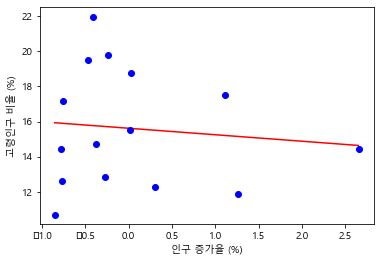

In [100]:
plt.plot(line_x,line_y,'r-')      # 빩간색 라인 
plt.plot(X,Y,'bo')                # 파란색 점
plt.xlabel('인구 증가율 (%)')
plt.ylabel('고령인구 비율 (%)')
plt.show()